# Create table for gene conversions from gtf

In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import pyranges as pr
import scvelo as  scv
import pandas as pd
import numpy as np
import os
from kipoiseq.extractors import CDSFetcher
import matplotlib.pyplot as plt

In [3]:
from utils import create_isoform_table

In [4]:
data_dir = '../../data/mouse/'

# Create major isoform table from gtf file

In [5]:
# Read in adata and gtf file
adata = scv.read(os.path.join(data_dir, "data", "count_matrices", "3_month_annotated.h5ad"))
gtf = pr.read_gtf(os.path.join(data_dir, "genome/mouse/mm10/gencode.vM25.basic.annotation.gtf.gz"), as_df=True, duplicate_attr=True)

In [6]:
cds_transcripts = CDSFetcher(os.path.join(data_dir, "genome/mouse/mm10/gencode.vM25.basic.annotation.gtf.gz"),
                            filter_valid_transcripts=False,
                            filter_biotype=True,
                            filter_tag=False,
                            on_error_warn=True).keys()

In [8]:
major_isoform, transcripts = create_isoform_table(adata, gtf, cds_transcripts)

Text(0, 0.5, 'Main transcript')

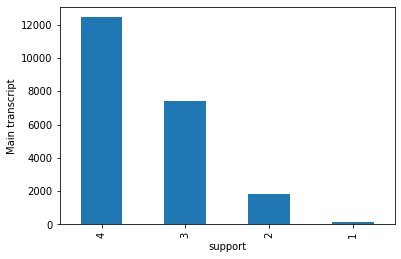

In [32]:
transcripts.groupby('gene_name').support.max().to_frame().support.value_counts().plot(kind='bar')
plt.xlabel('support')
plt.ylabel('Main transcript')

In [28]:
major_isoform.to_csv(os.path.join(data_dir, 'isoforms/mm10_major_isoforms_tms.csv'), index=False)